In [ ]:
# 전체데이터, PCA(Q_Ques), TP_score, Human(engnat, fmsize, hand 제외) (PCA + 12)

In [1]:
run profile1 

In [2]:
# 데이터로딩
df1 = pd.read_csv('/Users/harryjeong/python_data/maki_train.csv')
df2 = pd.read_csv('/Users/harryjeong/python_data/maki_test_x.csv')
submission = pd.read_csv('/Users/harryjeong/python_data/sample_submission.csv')

In [3]:
# df1을 종속변수 독립변수로 분리
train_y = df1.voted
df1 = df1.drop('voted',axis=1)

In [4]:
# 제거할 변수 목록 저장         
drop1 = ['QaE', 'QbE', 'QcE', 'QdE', 'QeE', 'QfE', 'QgE', 'QhE', 'QiE', 'QkE',
          'QjE', 'QlE', 'QmE', 'QnE', 'QoE', 'QpE', 'QqE', 'QrE', 'QsE','QtE',
          'wf_01', 'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05',
       'wr_06', 'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13',
      'familysize','engnat','hand' ]

# df1, df2에서 위 목록 제거
df1 = df1.drop(drop1,axis=1)
df2 = df2.drop(drop1,axis=1)
df1 = df1.iloc[:,1:]
df2 = df2.iloc[:,1:]

In [5]:
# TP_score 구하기 
fea2 = ['tp01','tp02','tp03','tp04','tp05','tp06','tp07','tp08','tp09','tp10']
df1.loc[:,fea2] = df1.loc[:,fea2].applymap(lambda x: 7 - x)
df2.loc[:,fea2] = df2.loc[:,fea2].applymap(lambda x: 7 - x)

# 짝수 질문은 reverse가 필요함 
fea3 = ['tp02','tp04','tp06','tp08','tp10']
df1.loc[:,fea3] = df1.loc[:,fea3].applymap(lambda x: 0 if x == 0 else 8 - x)
df2.loc[:,fea3] = df2.loc[:,fea3].applymap(lambda x: 0 if x == 0 else 8 - x)

# train data 의 TIPI 계산
df1['성실성']  = (df1.tp03 + df1.tp08)/2
df1['친화성']= (df1.tp07 + df1.tp02)/2
df1['정서정안정성'] = (df1.tp09 + df1.tp04)/2
df1['경험개방성'] = (df1.tp05 + df1.tp10)/2
df1['외향성'] =(df1.tp01 + df1.tp06)/2

# test data 의 TIPI계산
df2['성실성']  = (df2.tp03 + df2.tp08)/2
df2['친화성']= (df2.tp07 + df2.tp02)/2
df2['정서정안정성'] = (df2.tp09 + df2.tp04)/2
df2['경험개방성'] = (df2.tp05 + df2.tp10)/2
df2['외향성'] =(df2.tp01 + df2.tp06)/2

df1 = df1.drop(fea2,axis=1)
df2 = df2.drop(fea2,axis=1)

In [6]:
# 라벨인코더 
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df1['gender_code'] = label.fit_transform(df1['gender'])
df1['age_group_code'] = label.fit_transform(df1['age_group'])
df1['race_code'] = label.fit_transform(df1['race'])
df1['religion_code'] = label.fit_transform(df1['religion'])

df2['gender_code'] = label.fit_transform(df2['gender'])
df2['age_group_code'] = label.fit_transform(df2['age_group'])
df2['race_code'] = label.fit_transform(df2['race'])
df2['religion_code'] = label.fit_transform(df2['religion'])

drop3= ['gender','age_group','race','religion']
df1 = df1.drop(drop3,axis=1)
df2= df2.drop(drop3,axis=1)

In [7]:
# 스케일링 
from sklearn.preprocessing import StandardScaler as standard
m_sc = standard()
m_sc.fit(df1)
train_x_sc = m_sc.transform(df1)
test_x_sc = m_sc.transform(df2)

# 데이터프레임으로 변경
df1 = DataFrame(train_x_sc, columns = df1.columns.tolist())
df2 = DataFrame(test_x_sc,columns = df1.columns.tolist())

In [8]:
# Q_Ques만 뽑아서 PCA 진행
Q_Ques = ['QaA', 'QbA', 'QcA', 'QdA', 'QeA',
           'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 
           'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 
           'QpA', 'QqA', 'QrA', 'QsA', 'QtA']

# Q_Ques 선택한 변수 세팅
qdf1 = df1.loc[:,Q_Ques]
qdf2 = df2.loc[:,Q_Ques]

# 추후 합해야 하므로 Q_Ques 제거한 변수 세팅
df1 = df1.drop(Q_Ques,axis=1)
df2 = df2.drop(Q_Ques,axis=1)

In [10]:
# PCA
vscore_te = []
for i in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95] :
    from sklearn.decomposition import PCA
    m_pca = PCA(n_components = i)            # n_components : 인공변수 갯수 
    m_pca.fit(qdf1)                       # y의 fitting 필요 없음 
    
    train_x_pca = m_pca.transform(qdf1)
    test_x_pca = m_pca.transform(qdf2)
    
    s1_columns = np.arange(1, len(train_x_pca[1]) + 1)
    train_x_pca = DataFrame(train_x_pca, columns = s1_columns)
    test_x_pca = DataFrame(test_x_pca, columns = s1_columns)   
    
    c1 = train_x_pca.columns.tolist()
    c2 = df1.columns.tolist()
    c3 = c1 + c2
    
    df1_new = DataFrame(np.hstack([train_x_pca, df1]), columns = c3)
    df2_new = DataFrame(np.hstack([test_x_pca, df2]), columns = c3)
    
    # train_test_split 
    train_x1, test_x1, train_y1, test_y1 = train_test_split(df1_new, train_y, random_state= 0)
    
    # RF
    m_rf = rf(random_state = 0)
    m_rf.fit(train_x1, train_y1)
    
    # test 데이터로 체크
    vscore_te.append(m_rf.score(test_x1, test_y1))    # 0.694 / 0.85

In [11]:
vscore_te

[0.6902398313274181,
 0.6902398313274181,
 0.6902398313274181,
 0.6899762804181675,
 0.6916454361767548,
 0.6905912325397523,
 0.6932267416322586,
 0.6911183343582535,
 0.689273477993499,
 0.690064130721251,
 0.6941052446630941,
 0.6920846876921726,
 0.693929544056927]

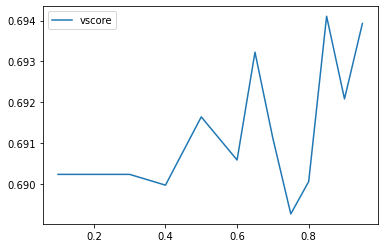

In [12]:
import matplotlib.pyplot as plt
plt.plot([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95], vscore_te, label = 'vscore')
plt.legend()

In [13]:
# PCA 인공변수 개수 고정 및 RF 매개변수 튜닝
from sklearn.decomposition import PCA
m_pca = PCA(n_components = 0.85)            # n_components : 인공변수 갯수 
m_pca.fit(qdf1)                       # y의 fitting 필요 없음 
    
train_x_pca = m_pca.transform(qdf1)
test_x_pca = m_pca.transform(qdf2)
    
s1_columns = np.arange(1, len(train_x_pca[1]) + 1)
train_x_pca = DataFrame(train_x_pca, columns = s1_columns)
test_x_pca = DataFrame(test_x_pca, columns = s1_columns)
    
c1 = train_x_pca.columns.tolist()
c2 = df1.columns.tolist()
c3 = c1 + c2
    
df1_new = DataFrame(np.hstack([train_x_pca, df1]), columns = c3)
df2_new = DataFrame(np.hstack([test_x_pca, df2]), columns = c3)

# train_test_split 
train_x1, test_x1, train_y1, test_y1 = train_test_split(df1_new, train_y, random_state= 0)
    
v_score_te = [] ; v_score_tr = []
for i in range(1, 101) :
    m_rf = rf(random_state = 0, n_estimators = i)
    m_rf.fit(train_x1, train_y1)
    v_score_tr.append(m_rf.score(train_x1, train_y1))
    v_score_te.append(m_rf.score(test_x1, test_y1))
    
max(v_score_te)    # 0.694193
Series(v_score_te).sort_values(ascending = False)    # i = 88일때 best score    

87    0.694193
99    0.694105
93    0.693842
95    0.693402
89    0.693227
        ...   
4     0.639989
3     0.632698
2     0.627515
0     0.604849
1     0.601160
Length: 100, dtype: float64

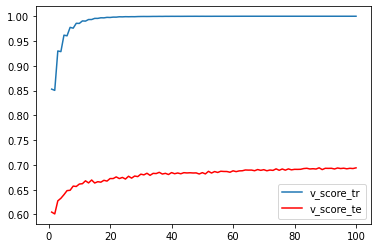

In [15]:
import matplotlib.pyplot as plt
plt.plot(np.arange(1, 101), v_score_tr, label = 'v_score_tr')
plt.plot(np.arange(1, 101), v_score_te, label = 'v_score_te', color = 'red')
plt.legend()    

In [16]:
# RF
m_rf = rf(random_state = 0, n_estimators = 88)
m_rf.fit(df1_new, train_y)

pred_y = m_rf.predict(df2_new)
submission['voted'] = pred_y

In [17]:
sum(submission['voted'] == 1)

6091

In [18]:
sum(submission['voted'] == 2)

5292

In [22]:
submission.to_csv('sample_submission_전체_PCA2.csv')    # 0.6958